# 决策树
[决策树算法原理](http://www.cnblogs.com/pinard/p/6050306.html)

* 决策树(Decision Tree)是在已知各种情况发生概率的基础上，通过构成决策树来求取净现值的期望值大于等于零的概率，评价项目风险，判断其可行性的决策分析方法，是直观运用概率分析的一种图解法。由于这种决策分支画成图形很像一棵树的枝干，故称决策树。

* "信息熵"是度量样本集合纯度的最常用的指标之一，假定当前样本集合$D$中第$k$类样本所占的比例是$p_k$($k=1,2,3,...,|y|$),则$D$的信息熵为：
$H(X)=-\sum_{k=1}^{|y|}p_k\log_2{p_k}$

## ID3算法（信息增益）
* 我们让H(X)代表度量X未分类的信息熵，条件熵H(X|Y)度量了我们在知道Y以后X剩下的不确定性，那么H(X)-H(X|Y)呢？从上面的描述大家可以看出，它度量了X在知道Y以后不确定性减少程度。在决策树ID3算法中叫做信息增益。ID3算法就是用信息增益来判断当前节点应该用什么特征来构建决策树。信息增益大，则越适合用来分类。：

$Gain(D,a)=H(X)-H(X|Y)=H(X)-\sum_{v=1}^V\frac{|D^v|}{|D|}H(X)$

算法的过程为：

1. 初始化信息增益的阈值$ϵ$
2. 判断样本是否为同一类输出$D_i$，如果是则返回单节点树T。标记类别为DiDi
3. 判断特征是否为空，如果是则返回单节点树$T$，标记类别为样本中输出类别D实例数最多的类别。
4. 计算A中的各个特征（一共n个）对输出D的信息增益，选择信息增益最大的特征$A_g$
5. 如果$A_g$的信息增益小于阈值$ϵ$，则返回单节点树T，标记类别为样本中输出类别D实例数最多的类别。
6. 否则，按特征$A_g$的不同取值$A_{gi}$将对应的样本输出D分成不同的类别DiDi。每个类别产生一个子节点。对应特征值为$A_{gi}$。返回增加了节点的数T。
7. 对于所有的子节点，令$D=Di,A=A−{A_g},D=D_i,A=A−\{A_g\}$递归调用2-6步，得到子树$A_i$并返回。

## ID3算法问题
ID3算法虽然提出了新思路，但是还是有很多值得改进的地方。　　

1. ID3没有考虑连续特征，比如长度，密度都是连续值，无法在ID3运用。这大大限制了ID3的用途。
1. ID3采用信息增益大的特征优先建立决策树的节点。很快就被人发现，在相同条件下，取值比较多的特征比取值少的特征信息增益大。比如一个变量有2个值，各为1/2，另一个变量为3个值，各为1/3，其实他们都是完全不确定的变量，但是取3个值的比取2个值的信息增益大。如果校正这个问题呢？
1. ID3算法对于缺失值的情况没有做考虑
1. 没有考虑过拟合的问题
1. **信息增益准则偏好可取值数目较多的属性**

* 由于现在都不怎么单纯使用决策树，而且ID3更少使用，还有篇幅的问题，在这里不会有具体ID3算法的实现，但是感兴趣的人推荐看：
[ID3python实现](https://blog.csdn.net/wzmsltw/article/details/51039928)

## C4.5（信息增益率）
* $Gain\_ratio(D,a)=\frac{Gain(D,a)}{IV(a)}$
* $IV(a)=-\sum_{v=1}^V\frac{|D^v|}{|D|}\log_2(\frac{|D^v|}{|D|})$
* $IV(a)称为属性的固有值，一般属性a的可能取值越多，IV(a)一般越大$

## C4.5算法的问题
1. 由于决策树算法非常容易过拟合，因此对于生成的决策树必须要进行剪枝。(待会儿会讲讲剪枝的问题)
1. C4.5生成的是多叉树，即一个父节点可以有多个节点。很多时候，在计算机中二叉树模型会比多叉树运算效率高。如果采用二叉树，可以提高效率。
1. C4.5只能用于分类，如果能将决策树用于回归的话可以扩大它的使用范围。
[python实现决策树C4.5算法(在ID3基础上改进)](https://blog.csdn.net/chenxiqilin/article/details/50395809)

## CART决策树（使用Gini系数）
* 在普通的决策树算法里，CART算法算是比较优的算法了。scikit-learn的决策树使用的也是CART算法。

CART分类树算法使用基尼系数来代替信息增益比，基尼系数代表了模型的不纯度，基尼系数越小，则不纯度越低，特征越好。具体的，在分类问题中，假设有K个类别，第k个类别的概率为$p_k$, 则基尼系数的表达式为：
![](./img/1.PNG)
对于个给定的样本D,假设有K个类别, 第k个类别的数量为$C_k$,则样本D的基尼系数表达式为：
![](./img/2.PNG)
对于样本D,如果根据特征A的某个值a,把D分成D1和D2两部分，则在特征A的条件下，D的基尼系数表达式为：
![](./img/3.PNG)
于是在候选属性集合A众，选择那个使划分后的基尼指数最小的属性作为最优划分：$a_*=argmin Gini\_index(D,a)$

## 连续值、缺失值怎么处理
1. 连续值处理：连续属性离散化
    * C4.5：Information Gain （Ratio） based Threshold（采用二分法对连续属性进行处理）
    * CART：遍历所有输入变量j 和切分点s，根据最小化平方误差准则选取；
![](./img/4.PNG)

1. 缺失值处理：
    * 放弃不完整样本
    * 补充缺失值
    * 率化缺失值：对缺失值的样本赋予该属性所有属性值的概率分布,即将缺失值按照其所在属性已知值的相对概率分布来创建决策树。
    * 缺失值单独分支

## 剪枝问题
![](./img/5.PNG)
* 预剪枝：使得决策树很多分支都没有“展开”，降低了过拟合的风险，还显著减少了决策树德训练时间开销和测试时间开销。
* 后剪枝：通常比预剪枝决策树保留更多的分支，一般情况下，欠拟合风险很小，泛化性能优于预剪枝决策树，不过训练开销比未剪枝和预剪枝决策树大的多。

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

iris_data = pd.read_csv('./data/iris.data')
iris_data.columns = ['sepal_length_cm', 'sepal_width_cm', 'petal_length_cm', 'petal_width_cm', 'class']
iris_data.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


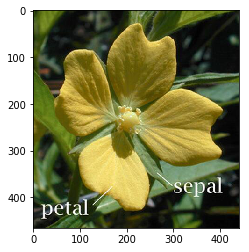

In [6]:
from PIL import Image
img=Image.open('./img/test.jpg')
plt.imshow(img)
plt.show()

In [7]:
iris_data.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,149.000000,149.000000,149.000000,149.000000
mean,5.848322,3.051007,3.774497,1.205369
std,0.828594,0.433499,1.759651,0.761292
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


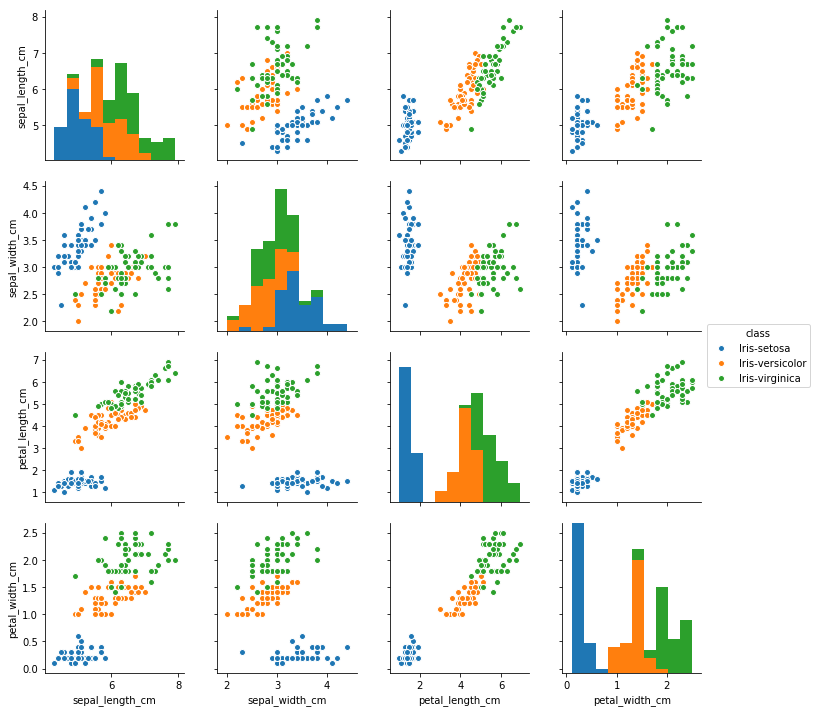

In [8]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sb

sb.pairplot(iris_data.dropna(), hue='class')#sb.pairplot()是将数据集中的两两变量组合画图，hue分类

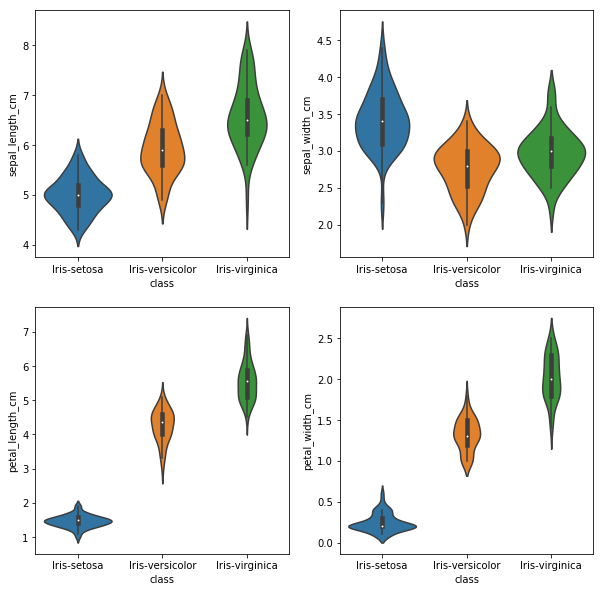

In [9]:
plt.figure(figsize=(10, 10))
for column_index, column in enumerate(iris_data.columns):
    if column == 'class':
        continue
    plt.subplot(2, 2, column_index + 1)
    sb.violinplot(x='class', y=column, data=iris_data)

In [11]:
from sklearn.model_selection import train_test_split

all_inputs = iris_data[['sepal_length_cm', 'sepal_width_cm',
                             'petal_length_cm', 'petal_width_cm']].values

all_classes = iris_data['class'].values

(training_inputs,
 testing_inputs,
 training_classes,
 testing_classes) = train_test_split(all_inputs, all_classes, test_size=0.25, random_state=1)

In [18]:
?DecisionTreeClassifier

In [12]:
from sklearn.tree import DecisionTreeClassifier
#  1.criterion  gini  or  entropy

#  2.splitter  best or random 前者是在所有特征中找最好的切分点 后者是在部分特征中（数据量大的时候）

#  3.max_features  None（所有），log2，sqrt，N  特征小于50的时候一般使用所有的

#  4.max_depth  数据少或者特征少的时候可以不管这个值，如果模型样本量多，特征也多的情况下，可以尝试限制下

#  5.min_samples_split  如果某节点的样本数少于min_samples_split，则不会继续再尝试选择最优特征来进行划分
#                       如果样本量不大，不需要管这个值。如果样本量数量级非常大，则推荐增大这个值。

#  6.min_samples_leaf  这个值限制了叶子节点最少的样本数，如果某叶子节点数目小于样本数，则会和兄弟节点一起被
#                      剪枝，如果样本量不大，不需要管这个值，大些如10W可是尝试下5

#  7.min_weight_fraction_leaf 这个值限制了叶子节点所有样本权重和的最小值，如果小于这个值，则会和兄弟节点一起
#                          被剪枝默认是0，就是不考虑权重问题。一般来说，如果我们有较多样本有缺失值，
#                          或者分类树样本的分布类别偏差很大，就会引入样本权重，这时我们就要注意这个值了。

#  8.max_leaf_nodes 通过限制最大叶子节点数，可以防止过拟合，默认是"None”，即不限制最大的叶子节点数。
#                   如果加了限制，算法会建立在最大叶子节点数内最优的决策树。
#                   如果特征不多，可以不考虑这个值，但是如果特征分成多的话，可以加以限制
#                   具体的值可以通过交叉验证得到。

#  9.class_weight 指定样本各类别的的权重，主要是为了防止训练集某些类别的样本过多
#                 导致训练的决策树过于偏向这些类别。这里可以自己指定各个样本的权重
#                 如果使用“balanced”，则算法会自己计算权重，样本量少的类别所对应的样本权重会高。

#  10.min_impurity_split 这个值限制了决策树的增长，如果某节点的不纯度
#                       (基尼系数，信息增益，均方差，绝对差)小于这个阈值
#                       则该节点不再生成子节点。即为叶子节点 。

decision_tree_classifier = DecisionTreeClassifier()

# Train the classifier on the training set
decision_tree_classifier.fit(training_inputs, training_classes)

# Validate the classifier on the testing set using classification accuracy
decision_tree_classifier.score(testing_inputs, testing_classes)

0.9736842105263158

[1.         0.93333333 1.         0.93333333 0.93333333 0.86666667
 0.93333333 1.         1.         1.        ]


c:\users\adsss\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Average score: 0.96')

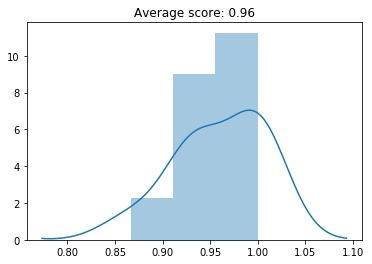

In [20]:
from sklearn.model_selection import cross_val_score
import numpy as np
decision_tree_classifier = DecisionTreeClassifier()

# cross_val_score returns a list of the scores, which we can visualize
# to get a reasonable estimate of our classifier's performance
cv_scores = cross_val_score(decision_tree_classifier, all_inputs, all_classes, cv=10)
print (cv_scores)
#kde=False
sb.distplot(cv_scores)
plt.title('Average score: {}'.format(np.mean(cv_scores)))

[0.66666667 0.66666667 0.66666667 0.66666667 0.66666667 0.66666667
 0.66666667 0.66666667 0.66666667 0.64285714]


c:\users\adsss\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Average score: 0.6642857142857144')

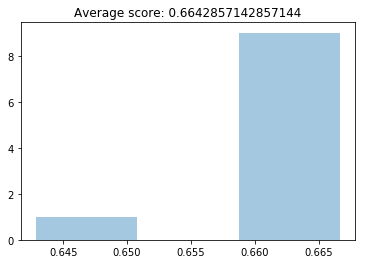

In [21]:
# 预剪枝：控制深度
decision_tree_classifier = DecisionTreeClassifier(max_depth=1)

cv_scores = cross_val_score(decision_tree_classifier, all_inputs, all_classes, cv=10)
print (cv_scores)
sb.distplot(cv_scores, kde=False)
plt.title('Average score: {}'.format(np.mean(cv_scores)))

In [28]:
#找到最好的预剪枝深度
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import StratifiedKFold

decision_tree_classifier = DecisionTreeClassifier()

parameter_grid = {'max_depth': [1, 2, 3, 4, 5],
                  'max_features': [1, 2, 3, 4]}

cross_validation = StratifiedKFold(all_classes, n_folds=10)

grid_search = GridSearchCV(decision_tree_classifier,
                           param_grid=parameter_grid,
                           cv=cross_validation)

grid_search.fit(all_inputs, all_classes)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score: 0.959731543624161
Best parameters: {'max_depth': 3, 'max_features': 4}


Text(33,0.5,'max_depth')

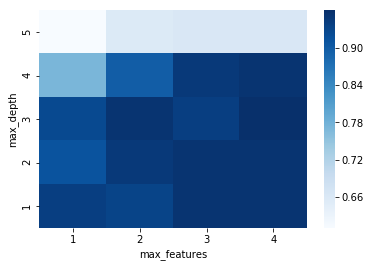

In [29]:
grid_visualization = []

for grid_pair in grid_search.grid_scores_:
    grid_visualization.append(grid_pair.mean_validation_score)
    
grid_visualization = np.array(grid_visualization)
grid_visualization.shape = (5, 4)
sb.heatmap(grid_visualization, cmap='Blues')
plt.xticks(np.arange(4) + 0.5, grid_search.param_grid['max_features'])
plt.yticks(np.arange(5) + 0.5, grid_search.param_grid['max_depth'][::-1])
plt.xlabel('max_features')
plt.ylabel('max_depth')

In [30]:
decision_tree_classifier = grid_search.best_estimator_
decision_tree_classifier

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=4, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [31]:
import sklearn.tree as tree
from sklearn.externals.six import StringIO

with open('iris_dtc.dot', 'w') as out_file:
    out_file = tree.export_graphviz(decision_tree_classifier, out_file=out_file)
#http://www.graphviz.org/